In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


In [ ]:
# Define the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [ ]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                      

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

Epoch 1/10
750/750 [==============================] - 192s 252ms/step - loss: 0.1565 - accuracy: 0.9523 - val_loss: 0.0597 - val_accuracy: 0.9823
Epoch 2/10
750/750 [==============================] - 177s 236ms/step - loss: 0.0635 - accuracy: 0.9806 - val_loss: 0.0398 - val_accuracy: 0.9885
Epoch 3/10
750/750 [==============================] - 177s 236ms/step - loss: 0.0489 - accuracy: 0.9852 - val_loss: 0.0382 - val_accuracy: 0.9880
Epoch 4/10
750/750 [==============================] - 177s 236ms/step - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0347 - val_accuracy: 0.9905
Epoch 5/10
750/750 [==============================] - 177s 237ms/step - loss: 0.0376 - accuracy: 0.9877 - val_loss: 0.0329 - val_accuracy: 0.9902
Epoch 6/10
750/750 [==============================] - 177s 236ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 0.0345 - val_accuracy: 0.9899
Epoch 7/10
750/750 [==============================] - 173s 231ms/step - loss: 0.0280 - accuracy: 0.9904 - val_loss: 0.0289 -

In [ ]:
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 8s 27ms/step - loss: 0.0212 - accuracy: 0.9939
Test Accuracy: 0.9939000010490417


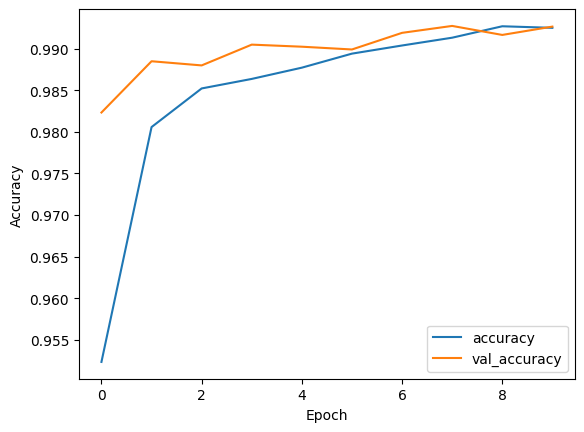

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
import tensorflow as tf

# Your model training and testing code...

# Save the Keras model as .h5 file
model.save('MNIST_model.h5')

# Convert the saved model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('MNIST.tflite', 'wb') as f:
    f.write(tflite_model)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

1/1 [==============================] - 0s 19ms/step
predicted value =  6


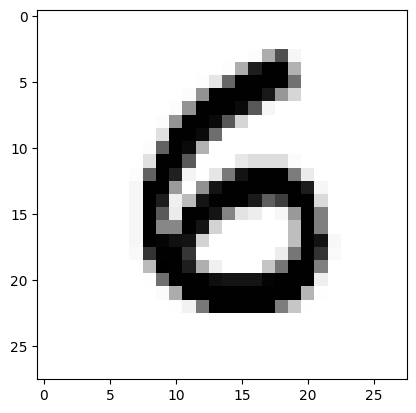

In [17]:
image_index = 446  # index range = 0 to 10000   27
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("predicted value = ",pred.argmax())